# Prediction Using Decision Tree Algorithm
## By: Sayonita Ghosh Roy

### Dataset: "Iris"
### Objective: To create the Decision Tree Classifier, visualize it graphically and to check its performance with new data

**Importing Necessary Libraries**

In [11]:
import numpy as np
import pandas as pd
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly_express as px
%matplotlib inline

**Loading The Data**

In [12]:
iris=pd.read_csv("Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Informations about the Data**

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


**Some General Visualizations of the Data**

<Figure size 576x576 with 0 Axes>

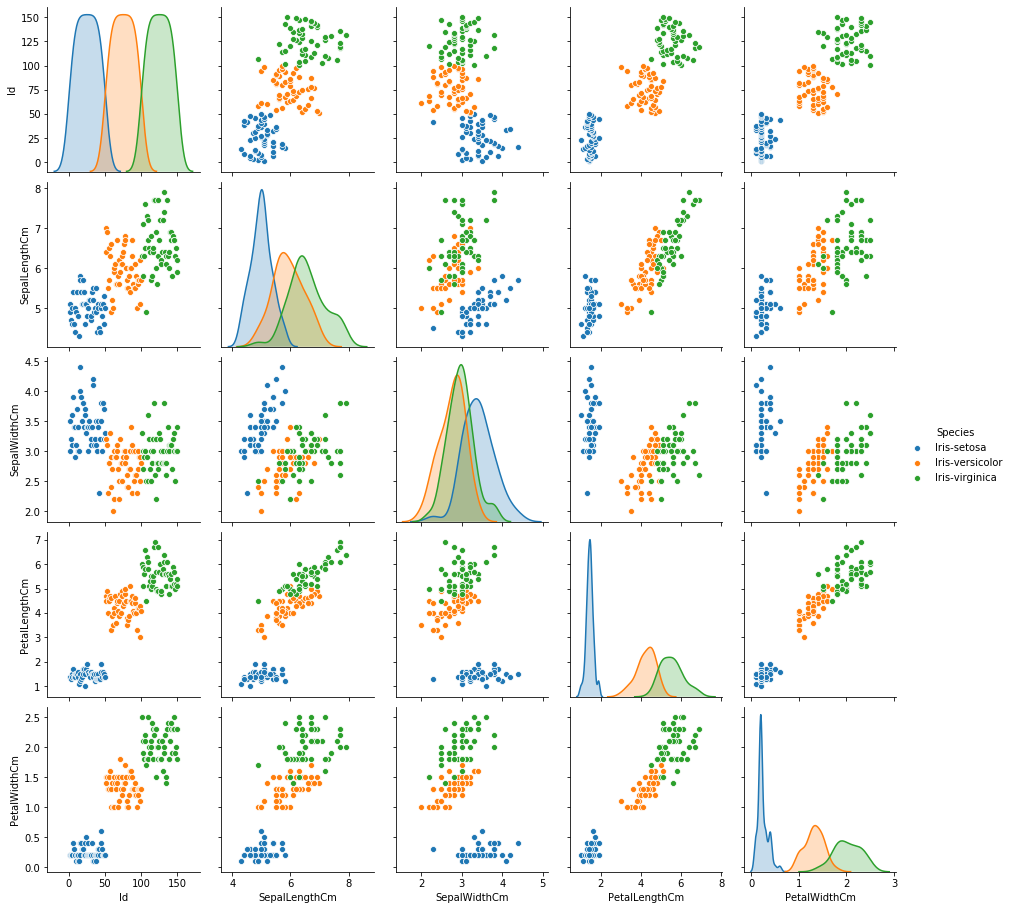

In [14]:
#Paired Scatter plots of the data
plt.figure(figsize=(8, 8))
ax = sns.pairplot(iris, hue='Species')
plt.show()

In [15]:
#3-D Scatter Plot
px.scatter_3d(iris, x="PetalLengthCm", y="PetalWidthCm", z="SepalLengthCm", size="SepalWidthCm", 
              color="Species", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"yellow"})

**Splitting the data into Training and Testing sets**

In [16]:
x,y = iris.iloc[ : ,1: -1], iris.iloc[ : , -1]
x_train, x_val, y_train, y_val= train_test_split(x,y,random_state=0, shuffle= True, test_size=0.2)
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


**Preparing the Decision Tree Classifier**

In [17]:
treemodel=DecisionTreeClassifier(max_depth = 6)
treemodel.fit(x_train, y_train)
y_preds= treemodel.predict(x_val)

**Visualization of the Decision Tree**

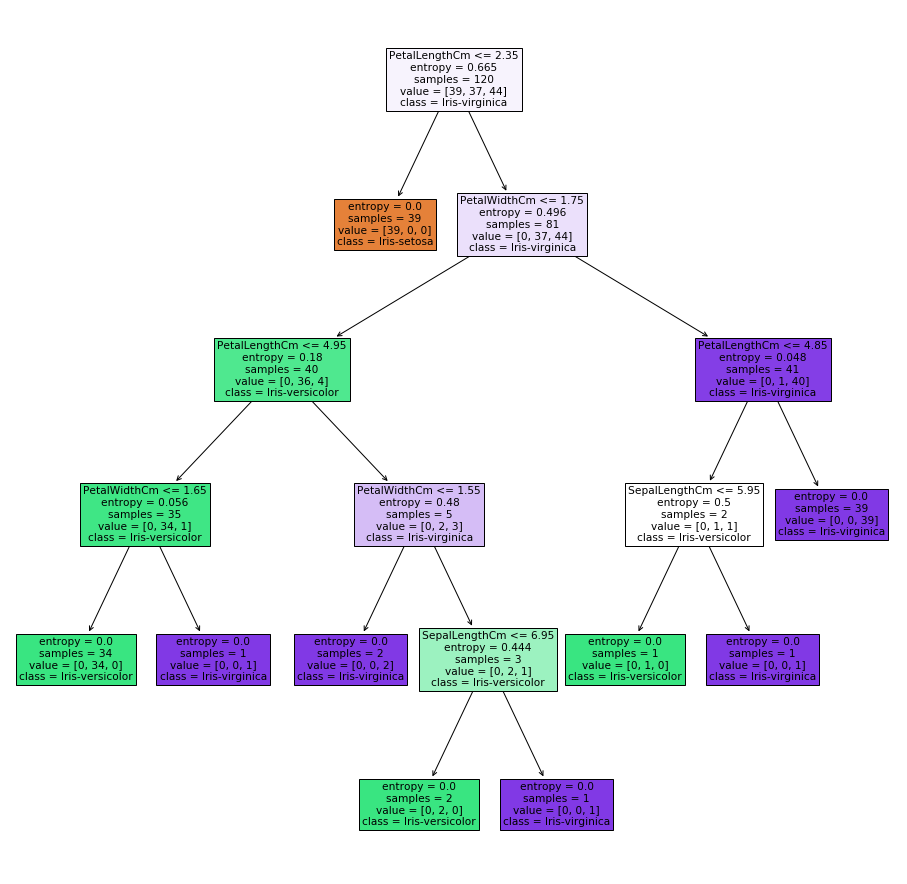

In [18]:
plt.figure(figsize = (16,16))
plot_tree(treemodel, 
          feature_names=x.columns, 
          class_names=y.unique(), 
          filled= True);

**Predicting Accuracy of the Model**

In [19]:
print(classification_report(y_val, y_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



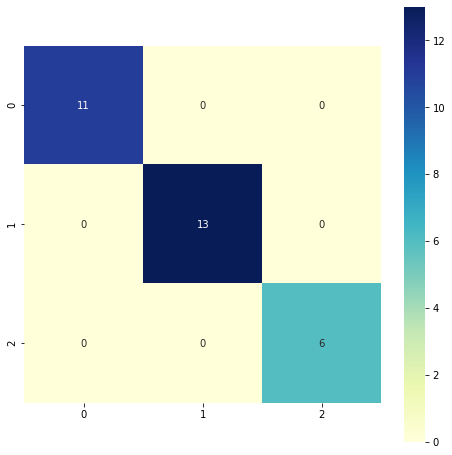

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_val,y_preds), annot=True, square=True, cmap="YlGnBu");

## Thank You!